In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
import torchvision.datasets as datasets
import imageio
import numpy as np
import matplotlib
from torchvision.utils import make_grid, save_image
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
from tqdm import tqdm

# Define learning parameters

In [2]:
# learning parameters
batch_size = 512
epochs = 100
sample_size = 64 # fixed sample size for generator
nz = 128 # latent vector size
k = 1 # number of steps to apply to the discriminator
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Prepare training dataset

In [3]:

transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,)),
])
to_pil_image = transforms.ToPILImage()

# Make input, output folders
!mkdir -p input
!mkdir -p outputs

# Load train data
train_data = datasets.MNIST(
    root='input/data',
    train=True,
    download=True,
    transform=transform
)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

# Generator

In [4]:
class Generator(nn.Module):
    def __init__(self, nz):
        super(Generator, self).__init__()
        self.nz = nz
        self.main = nn.Sequential(
            nn.Linear(self.nz, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )
    def forward(self, x):
        return self.main(x).view(-1, 1, 28, 28)

# Discriminator

In [5]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.n_input = 784
        self.main = nn.Sequential(
            nn.Linear(self.n_input, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )
    def forward(self, x):
        x = x.view(-1, 784)
        return self.main(x)

In [6]:
generator = Generator(nz).to(device)
discriminator = Discriminator().to(device)
print('##### GENERATOR #####')
print(generator)
print('######################')
print('\n##### DISCRIMINATOR #####')
print(discriminator)
print('######################')

##### GENERATOR #####
Generator(
  (main): Sequential(
    (0): Linear(in_features=128, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Linear(in_features=512, out_features=1024, bias=True)
    (5): LeakyReLU(negative_slope=0.2)
    (6): Linear(in_features=1024, out_features=784, bias=True)
    (7): Tanh()
  )
)
######################

##### DISCRIMINATOR #####
Discriminator(
  (main): Sequential(
    (0): Linear(in_features=784, out_features=1024, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=1024, out_features=512, bias=True)
    (4): LeakyReLU(negative_slope=0.2)
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=512, out_features=256, bias=True)
    (7): LeakyReLU(negative_slope=0.2)
    (8): Dropout(p=0.3, inplace=False)
    (9): Linear(in_features=256, out_features=1

# Tools for training

In [7]:
# optimizers
optim_g = optim.Adam(generator.parameters(), lr=0.0002)
optim_d = optim.Adam(discriminator.parameters(), lr=0.0002)

In [8]:
# loss function
criterion = nn.BCELoss() # Binary Cross Entropy loss

In [9]:
losses_g = [] # to store generator loss after each epoch
losses_d = [] # to store discriminator loss after each epoch
images = [] # to store images generatd by the generator

In [10]:
# to create real labels (1s)
def label_real(size):
    data = torch.ones(size, 1)
    return data.to(device)
# to create fake labels (0s)
def label_fake(size):
    data = torch.zeros(size, 1)
    return data.to(device)


In [11]:
# function to create the noise vector
def create_noise(sample_size, nz):
    return torch.randn(sample_size, nz).to(device)

In [12]:
# to save the images generated by the generator
def save_generator_image(image, path):
    save_image(image, path)

In [13]:
# create the noise vector - fixed to track how GAN is trained.
noise = create_noise(sample_size, nz)

# Q. Write training loop

118it [00:27,  4.24it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


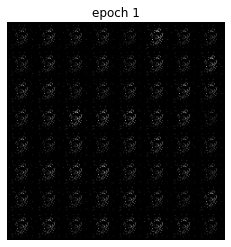

Epoch 1 of 100
Generator loss: 1.43477864, Discriminator loss: 0.87712011


118it [00:29,  4.02it/s]                         


Epoch 2 of 100
Generator loss: 2.06942349, Discriminator loss: 1.23830970


118it [00:29,  3.99it/s]                         


Epoch 3 of 100
Generator loss: 2.81536621, Discriminator loss: 0.99292671


118it [00:29,  3.98it/s]                         


Epoch 4 of 100
Generator loss: 2.67786792, Discriminator loss: 0.93639033


118it [00:29,  4.00it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


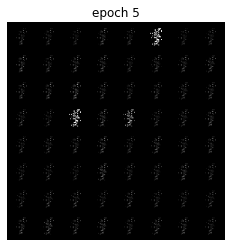

Epoch 5 of 100
Generator loss: 2.27219674, Discriminator loss: 0.89962155


118it [00:29,  4.03it/s]                         


Epoch 6 of 100
Generator loss: 1.40336018, Discriminator loss: 1.18727122


118it [00:29,  4.03it/s]                         


Epoch 7 of 100
Generator loss: 1.59444986, Discriminator loss: 1.12910137


118it [00:29,  4.02it/s]                         


Epoch 8 of 100
Generator loss: 1.32490201, Discriminator loss: 1.18930682


118it [00:29,  4.02it/s]                         


Epoch 9 of 100
Generator loss: 1.12236828, Discriminator loss: 1.29808009


118it [00:29,  4.01it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


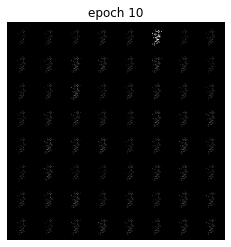

Epoch 10 of 100
Generator loss: 1.02314864, Discriminator loss: 1.20465817


118it [00:29,  4.02it/s]                         


Epoch 11 of 100
Generator loss: 1.45213346, Discriminator loss: 1.01666156


118it [00:29,  4.03it/s]                         


Epoch 12 of 100
Generator loss: 1.47237879, Discriminator loss: 1.32443556


118it [00:29,  4.00it/s]                         


Epoch 13 of 100
Generator loss: 1.63748272, Discriminator loss: 1.19878818


118it [00:29,  3.97it/s]                         


Epoch 14 of 100
Generator loss: 1.86839656, Discriminator loss: 1.07035582


118it [00:29,  4.00it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


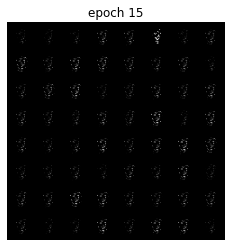

Epoch 15 of 100
Generator loss: 1.52827285, Discriminator loss: 1.14059889


118it [00:29,  4.00it/s]                         


Epoch 16 of 100
Generator loss: 1.83648455, Discriminator loss: 1.03541262


118it [00:29,  4.03it/s]                         


Epoch 17 of 100
Generator loss: 2.02099019, Discriminator loss: 0.84246643


118it [00:29,  3.98it/s]                         


Epoch 18 of 100
Generator loss: 1.99821721, Discriminator loss: 0.88572329


118it [00:38,  3.04it/s]                         


Epoch 19 of 100
Generator loss: 3.60024011, Discriminator loss: 0.70232968


118it [00:37,  3.19it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


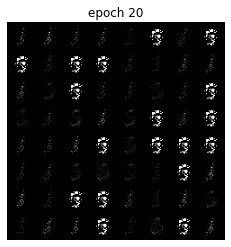

Epoch 20 of 100
Generator loss: 3.77168079, Discriminator loss: 0.59132637


118it [00:36,  3.23it/s]                         


Epoch 21 of 100
Generator loss: 4.28138732, Discriminator loss: 0.54464945


118it [00:36,  3.24it/s]                         


Epoch 22 of 100
Generator loss: 4.75603075, Discriminator loss: 0.56011672


118it [00:36,  3.25it/s]                         


Epoch 23 of 100
Generator loss: 3.59663400, Discriminator loss: 0.68848188


118it [00:36,  3.25it/s]                         


Epoch 24 of 100
Generator loss: 2.74688908, Discriminator loss: 0.67973849


118it [00:36,  3.24it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


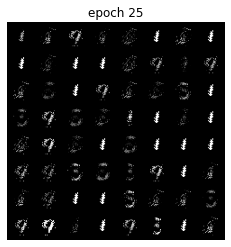

Epoch 25 of 100
Generator loss: 2.78372633, Discriminator loss: 0.54621694


118it [00:38,  3.03it/s]                         


Epoch 26 of 100
Generator loss: 2.88298963, Discriminator loss: 0.54021680


118it [00:39,  2.97it/s]                         


Epoch 27 of 100
Generator loss: 2.94111110, Discriminator loss: 0.57976809


118it [00:39,  3.02it/s]                         


Epoch 28 of 100
Generator loss: 3.03537973, Discriminator loss: 0.50302811


118it [00:39,  3.01it/s]                         


Epoch 29 of 100
Generator loss: 2.52263367, Discriminator loss: 0.72392795


118it [00:39,  3.01it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


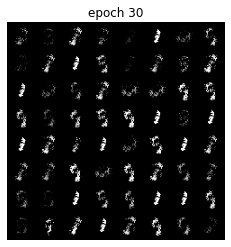

Epoch 30 of 100
Generator loss: 2.30433113, Discriminator loss: 0.69748443


118it [00:39,  3.01it/s]                         


Epoch 31 of 100
Generator loss: 2.70549581, Discriminator loss: 0.62122258


118it [00:39,  3.02it/s]                         


Epoch 32 of 100
Generator loss: 2.30684324, Discriminator loss: 0.78316625


118it [00:39,  3.01it/s]                         


Epoch 33 of 100
Generator loss: 2.11369048, Discriminator loss: 0.71569824


118it [00:39,  3.01it/s]                         


Epoch 34 of 100
Generator loss: 2.18631703, Discriminator loss: 0.72478634


118it [00:38,  3.06it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


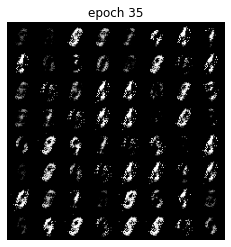

Epoch 35 of 100
Generator loss: 2.41347620, Discriminator loss: 0.68284052


118it [00:39,  3.02it/s]                         


Epoch 36 of 100
Generator loss: 2.61561589, Discriminator loss: 0.56907850


118it [00:37,  3.18it/s]                         


Epoch 37 of 100
Generator loss: 2.71474632, Discriminator loss: 0.59773066


118it [00:39,  3.02it/s]                         


Epoch 38 of 100
Generator loss: 2.43565327, Discriminator loss: 0.67977371


118it [00:37,  3.14it/s]                         


Epoch 39 of 100
Generator loss: 2.58055659, Discriminator loss: 0.61742929


118it [00:38,  3.09it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


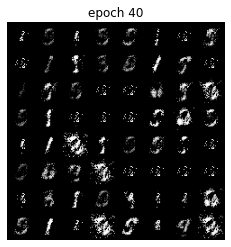

Epoch 40 of 100
Generator loss: 2.57898757, Discriminator loss: 0.62983670


118it [00:37,  3.14it/s]                         


Epoch 41 of 100
Generator loss: 2.51420016, Discriminator loss: 0.64392716


118it [00:38,  3.04it/s]                         


Epoch 42 of 100
Generator loss: 2.50243100, Discriminator loss: 0.61804064


118it [00:39,  3.00it/s]                         


Epoch 43 of 100
Generator loss: 2.55613343, Discriminator loss: 0.61612873


118it [00:37,  3.16it/s]                         


Epoch 44 of 100
Generator loss: 2.78903445, Discriminator loss: 0.59395467


118it [00:36,  3.24it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


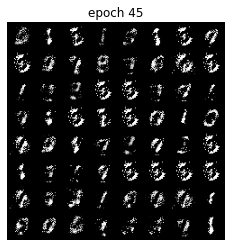

Epoch 45 of 100
Generator loss: 2.66807419, Discriminator loss: 0.69469168


118it [00:37,  3.16it/s]                         


Epoch 46 of 100
Generator loss: 2.83267455, Discriminator loss: 0.62337255


118it [00:39,  2.98it/s]                         


Epoch 47 of 100
Generator loss: 2.65649156, Discriminator loss: 0.65379410


118it [00:37,  3.11it/s]                         


Epoch 48 of 100
Generator loss: 2.63284589, Discriminator loss: 0.69453889


118it [00:37,  3.16it/s]                         


Epoch 49 of 100
Generator loss: 2.69989376, Discriminator loss: 0.61010019


118it [00:46,  2.56it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


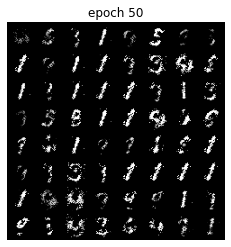

Epoch 50 of 100
Generator loss: 2.82955775, Discriminator loss: 0.59222512


118it [00:51,  2.28it/s]                         


Epoch 51 of 100
Generator loss: 2.69588768, Discriminator loss: 0.61938561


118it [00:48,  2.42it/s]                         


Epoch 52 of 100
Generator loss: 2.54711326, Discriminator loss: 0.65924938


118it [00:48,  2.45it/s]                         


Epoch 53 of 100
Generator loss: 2.60328791, Discriminator loss: 0.62805520


118it [00:48,  2.43it/s]                         


Epoch 54 of 100
Generator loss: 2.68173951, Discriminator loss: 0.64413519


118it [00:49,  2.38it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


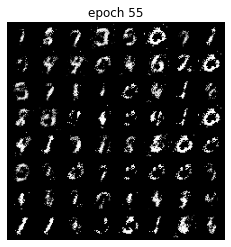

Epoch 55 of 100
Generator loss: 2.92800915, Discriminator loss: 0.58742467


118it [00:49,  2.41it/s]                         


Epoch 56 of 100
Generator loss: 2.55996144, Discriminator loss: 0.68683086


118it [00:49,  2.40it/s]                         


Epoch 57 of 100
Generator loss: 2.52553641, Discriminator loss: 0.68603301


118it [00:47,  2.48it/s]                         


Epoch 58 of 100
Generator loss: 2.56571711, Discriminator loss: 0.64570215


118it [00:32,  3.65it/s]                         


Epoch 59 of 100
Generator loss: 2.58405874, Discriminator loss: 0.64394682


118it [00:35,  3.29it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


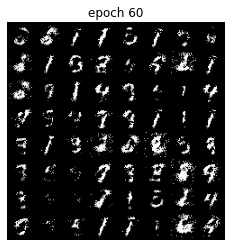

Epoch 60 of 100
Generator loss: 2.59986391, Discriminator loss: 0.65956798


118it [00:38,  3.04it/s]                         


Epoch 61 of 100
Generator loss: 2.49496636, Discriminator loss: 0.68158154


118it [00:35,  3.37it/s]                         


Epoch 62 of 100
Generator loss: 2.38826461, Discriminator loss: 0.68824642


118it [00:32,  3.61it/s]                         


Epoch 63 of 100
Generator loss: 2.41108600, Discriminator loss: 0.71086355


118it [00:31,  3.77it/s]                         


Epoch 64 of 100
Generator loss: 2.37629393, Discriminator loss: 0.70733281


118it [00:31,  3.72it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


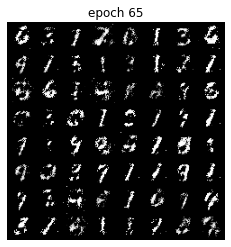

Epoch 65 of 100
Generator loss: 2.37008130, Discriminator loss: 0.65789394


118it [00:34,  3.45it/s]                         


Epoch 66 of 100
Generator loss: 2.27905477, Discriminator loss: 0.70137372


118it [00:33,  3.55it/s]                         


Epoch 67 of 100
Generator loss: 2.27425660, Discriminator loss: 0.71315625


118it [00:33,  3.48it/s]                         


Epoch 68 of 100
Generator loss: 2.25232186, Discriminator loss: 0.75328462


118it [00:34,  3.42it/s]                         


Epoch 69 of 100
Generator loss: 2.23131704, Discriminator loss: 0.72529748


118it [00:35,  3.29it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


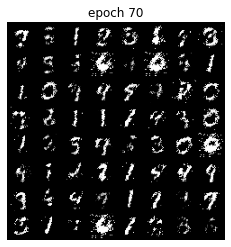

Epoch 70 of 100
Generator loss: 2.31297786, Discriminator loss: 0.67430274


118it [00:32,  3.67it/s]                         


Epoch 71 of 100
Generator loss: 2.27842267, Discriminator loss: 0.72091125


118it [00:32,  3.67it/s]                         


Epoch 72 of 100
Generator loss: 2.08544763, Discriminator loss: 0.74967495


118it [00:31,  3.72it/s]                         


Epoch 73 of 100
Generator loss: 2.07137553, Discriminator loss: 0.79743249


118it [00:33,  3.57it/s]                         


Epoch 74 of 100
Generator loss: 2.13969890, Discriminator loss: 0.76071905


118it [00:30,  3.90it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


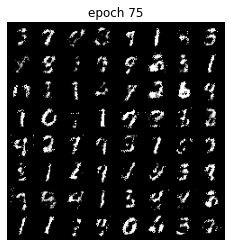

Epoch 75 of 100
Generator loss: 1.99820338, Discriminator loss: 0.77808287


118it [00:36,  3.22it/s]                         


Epoch 76 of 100
Generator loss: 1.92415997, Discriminator loss: 0.81701651


118it [00:41,  2.84it/s]                         


Epoch 77 of 100
Generator loss: 2.06331899, Discriminator loss: 0.78122471


118it [00:54,  2.15it/s]                         


Epoch 78 of 100
Generator loss: 2.09628667, Discriminator loss: 0.77465450


118it [00:59,  1.98it/s]                         


Epoch 79 of 100
Generator loss: 2.07977603, Discriminator loss: 0.74190192


118it [00:59,  1.97it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


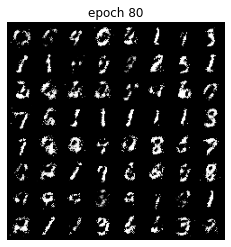

Epoch 80 of 100
Generator loss: 2.12768028, Discriminator loss: 0.79026909


118it [00:59,  1.99it/s]                         


Epoch 81 of 100
Generator loss: 2.07375481, Discriminator loss: 0.78074597


118it [00:59,  1.98it/s]                         


Epoch 82 of 100
Generator loss: 2.05633536, Discriminator loss: 0.79025230


118it [01:00,  1.95it/s]                         


Epoch 83 of 100
Generator loss: 2.18798951, Discriminator loss: 0.75250887


118it [01:00,  1.96it/s]                         


Epoch 84 of 100
Generator loss: 2.11800859, Discriminator loss: 0.77929174


118it [01:00,  1.95it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


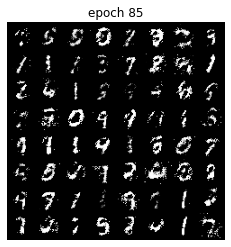

Epoch 85 of 100
Generator loss: 1.93293380, Discriminator loss: 0.81036738


118it [01:00,  1.96it/s]                         


Epoch 86 of 100
Generator loss: 2.07857118, Discriminator loss: 0.76985287


118it [00:55,  2.11it/s]                         


Epoch 87 of 100
Generator loss: 2.11601819, Discriminator loss: 0.76584703


118it [00:58,  2.03it/s]                         


Epoch 88 of 100
Generator loss: 1.94073543, Discriminator loss: 0.80660544


118it [00:56,  2.07it/s]                         


Epoch 89 of 100
Generator loss: 1.92604922, Discriminator loss: 0.82916570


118it [01:00,  1.96it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


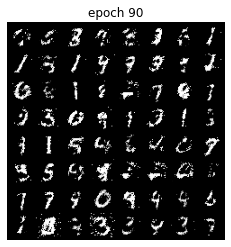

Epoch 90 of 100
Generator loss: 1.83143703, Discriminator loss: 0.84574966


118it [01:00,  1.96it/s]                         


Epoch 91 of 100
Generator loss: 1.95778080, Discriminator loss: 0.81353407


118it [00:57,  2.06it/s]                         


Epoch 92 of 100
Generator loss: 1.89414552, Discriminator loss: 0.80675752


118it [00:59,  1.98it/s]                         


Epoch 93 of 100
Generator loss: 1.85552225, Discriminator loss: 0.83847821


118it [00:56,  2.09it/s]                         


Epoch 94 of 100
Generator loss: 1.79941097, Discriminator loss: 0.84964728


118it [00:59,  2.00it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


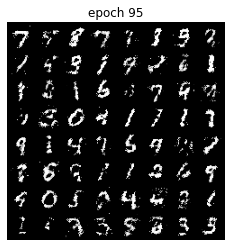

Epoch 95 of 100
Generator loss: 1.75218550, Discriminator loss: 0.85536517


118it [01:00,  1.96it/s]                         


Epoch 96 of 100
Generator loss: 1.85702495, Discriminator loss: 0.84443565


118it [01:00,  1.96it/s]                         


Epoch 97 of 100
Generator loss: 2.00384375, Discriminator loss: 0.78430273


118it [01:00,  1.96it/s]                         


Epoch 98 of 100
Generator loss: 1.91868967, Discriminator loss: 0.83181871


118it [00:57,  2.06it/s]                         


Epoch 99 of 100
Generator loss: 2.00815290, Discriminator loss: 0.80674636


118it [00:57,  2.05it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


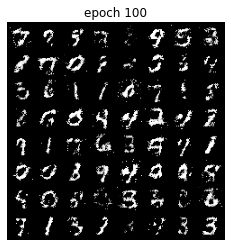

Epoch 100 of 100
Generator loss: 2.06026924, Discriminator loss: 0.79844545


118it [00:58,  2.02it/s]                         


Epoch 101 of 100
Generator loss: 1.83386301, Discriminator loss: 0.88573758


118it [01:00,  1.96it/s]                         


Epoch 102 of 100
Generator loss: 1.88807511, Discriminator loss: 0.82887346


118it [01:00,  1.96it/s]                         


Epoch 103 of 100
Generator loss: 1.94288691, Discriminator loss: 0.80514544


118it [00:59,  1.97it/s]                         


Epoch 104 of 100
Generator loss: 1.93407870, Discriminator loss: 0.78475440


118it [00:57,  2.07it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


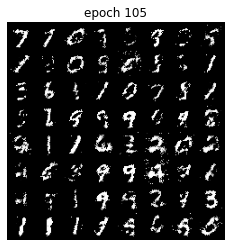

Epoch 105 of 100
Generator loss: 1.86181708, Discriminator loss: 0.84188253


118it [00:58,  2.02it/s]                         


Epoch 106 of 100
Generator loss: 1.97881663, Discriminator loss: 0.79640105


118it [01:00,  1.94it/s]                         


Epoch 107 of 100
Generator loss: 1.88257477, Discriminator loss: 0.83508804


118it [00:59,  1.97it/s]                         


Epoch 108 of 100
Generator loss: 1.89654665, Discriminator loss: 0.83851402


118it [01:00,  1.95it/s]                         


Epoch 109 of 100
Generator loss: 1.88815520, Discriminator loss: 0.80978209


118it [00:51,  2.27it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


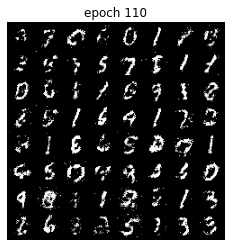

Epoch 110 of 100
Generator loss: 1.80395429, Discriminator loss: 0.84552572


118it [00:52,  2.26it/s]                         


Epoch 111 of 100
Generator loss: 1.81125804, Discriminator loss: 0.85866681


118it [00:58,  2.03it/s]                         


Epoch 112 of 100
Generator loss: 1.74784981, Discriminator loss: 0.87784753


118it [00:58,  2.02it/s]                         


Epoch 113 of 100
Generator loss: 1.64712053, Discriminator loss: 0.92287270


118it [00:58,  2.02it/s]                         


Epoch 114 of 100
Generator loss: 1.63382284, Discriminator loss: 0.91982054


118it [00:58,  2.02it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


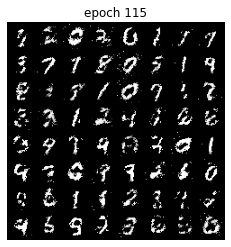

Epoch 115 of 100
Generator loss: 1.70791266, Discriminator loss: 0.88450421


118it [00:55,  2.11it/s]                         


Epoch 116 of 100
Generator loss: 1.85319598, Discriminator loss: 0.82952764


118it [00:57,  2.04it/s]                         


Epoch 117 of 100
Generator loss: 1.71092565, Discriminator loss: 0.86283736


118it [00:55,  2.14it/s]                         


Epoch 118 of 100
Generator loss: 1.69268834, Discriminator loss: 0.88537763


118it [00:56,  2.10it/s]                         


Epoch 119 of 100
Generator loss: 1.77777101, Discriminator loss: 0.85898625


118it [00:54,  2.15it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


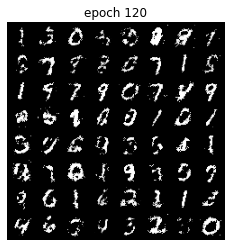

Epoch 120 of 100
Generator loss: 1.69552000, Discriminator loss: 0.87630682


118it [00:55,  2.12it/s]                         


Epoch 121 of 100
Generator loss: 1.63537102, Discriminator loss: 0.90174452


118it [00:56,  2.11it/s]                         


Epoch 122 of 100
Generator loss: 1.71893159, Discriminator loss: 0.90928945


118it [00:56,  2.10it/s]                         


Epoch 123 of 100
Generator loss: 1.63258958, Discriminator loss: 0.92320799


118it [00:58,  2.03it/s]                         


Epoch 124 of 100
Generator loss: 1.57780718, Discriminator loss: 0.92139111


118it [00:58,  2.01it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


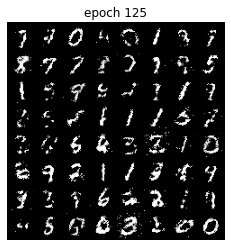

Epoch 125 of 100
Generator loss: 1.65798547, Discriminator loss: 0.89792181


118it [00:56,  2.09it/s]                         


Epoch 126 of 100
Generator loss: 1.67176446, Discriminator loss: 0.88015436


118it [00:56,  2.09it/s]                         


Epoch 127 of 100
Generator loss: 1.64430412, Discriminator loss: 0.90753022


118it [00:58,  2.03it/s]                         


Epoch 128 of 100
Generator loss: 1.64163428, Discriminator loss: 0.89805514


118it [00:56,  2.09it/s]                         


Epoch 129 of 100
Generator loss: 1.70776532, Discriminator loss: 0.87314421


118it [00:55,  2.13it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


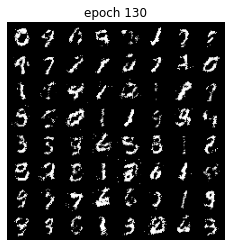

Epoch 130 of 100
Generator loss: 1.64679367, Discriminator loss: 0.90482591


118it [00:56,  2.07it/s]                         


Epoch 131 of 100
Generator loss: 1.53437505, Discriminator loss: 0.95868696


118it [00:58,  2.03it/s]                         


Epoch 132 of 100
Generator loss: 1.55849547, Discriminator loss: 0.94971592


118it [00:52,  2.26it/s]                         


Epoch 133 of 100
Generator loss: 1.63280715, Discriminator loss: 0.90240805


118it [00:45,  2.57it/s]                         


Epoch 134 of 100
Generator loss: 1.72024505, Discriminator loss: 0.89294947


118it [00:47,  2.47it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


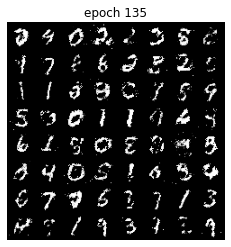

Epoch 135 of 100
Generator loss: 1.55825844, Discriminator loss: 0.94163521


118it [00:46,  2.56it/s]                         


Epoch 136 of 100
Generator loss: 1.53593528, Discriminator loss: 0.92859603


118it [00:52,  2.25it/s]                         


Epoch 137 of 100
Generator loss: 1.65432512, Discriminator loss: 0.90290799


118it [00:50,  2.33it/s]                         


Epoch 138 of 100
Generator loss: 1.56186637, Discriminator loss: 0.94904566


118it [00:52,  2.24it/s]                         


Epoch 139 of 100
Generator loss: 1.61138136, Discriminator loss: 0.90114820


118it [00:52,  2.23it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


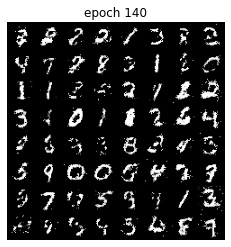

Epoch 140 of 100
Generator loss: 1.56776547, Discriminator loss: 0.94274698


118it [00:53,  2.20it/s]                         


Epoch 141 of 100
Generator loss: 1.59504329, Discriminator loss: 0.91439773


118it [00:49,  2.40it/s]                         


Epoch 142 of 100
Generator loss: 1.51423945, Discriminator loss: 0.94386531


118it [00:48,  2.45it/s]                         


Epoch 143 of 100
Generator loss: 1.62176335, Discriminator loss: 0.90958955


118it [00:47,  2.46it/s]                         


Epoch 144 of 100
Generator loss: 1.54557588, Discriminator loss: 0.93299377


118it [00:50,  2.36it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


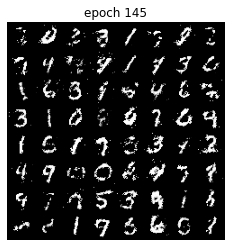

Epoch 145 of 100
Generator loss: 1.65207702, Discriminator loss: 0.90355411


118it [00:49,  2.41it/s]                         


Epoch 146 of 100
Generator loss: 1.59736819, Discriminator loss: 0.92411412


118it [00:53,  2.20it/s]                         


Epoch 147 of 100
Generator loss: 1.52352292, Discriminator loss: 0.94558026


118it [00:59,  1.98it/s]                         


Epoch 148 of 100
Generator loss: 1.57368126, Discriminator loss: 0.92764719


118it [00:59,  1.99it/s]                         


Epoch 149 of 100
Generator loss: 1.43616419, Discriminator loss: 0.97169254


118it [01:06,  1.77it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


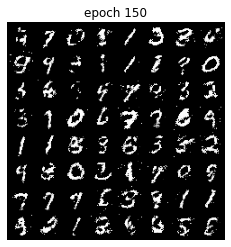

Epoch 150 of 100
Generator loss: 1.54511125, Discriminator loss: 0.93994497


118it [00:50,  2.32it/s]                         


Epoch 151 of 100
Generator loss: 1.61512975, Discriminator loss: 0.89605256


118it [00:55,  2.14it/s]                         


Epoch 152 of 100
Generator loss: 1.48683970, Discriminator loss: 0.95152606


118it [00:54,  2.17it/s]                         


Epoch 153 of 100
Generator loss: 1.47071335, Discriminator loss: 0.96549059


118it [00:56,  2.07it/s]                         


Epoch 154 of 100
Generator loss: 1.54681582, Discriminator loss: 0.92544037


118it [01:06,  1.78it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


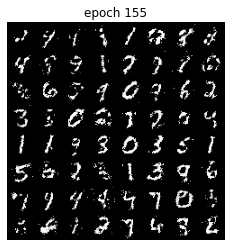

Epoch 155 of 100
Generator loss: 1.56964782, Discriminator loss: 0.93021715


118it [01:05,  1.81it/s]                         


Epoch 156 of 100
Generator loss: 1.56653792, Discriminator loss: 0.92780983


118it [00:48,  2.43it/s]                         


Epoch 157 of 100
Generator loss: 1.51543591, Discriminator loss: 0.95261018


118it [00:53,  2.20it/s]                         


Epoch 158 of 100
Generator loss: 1.45289655, Discriminator loss: 0.97081227


118it [00:54,  2.16it/s]                         


Epoch 159 of 100
Generator loss: 1.51990855, Discriminator loss: 0.96768363


118it [00:54,  2.15it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


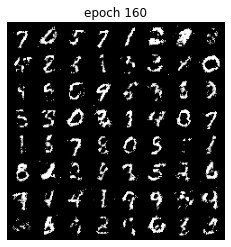

Epoch 160 of 100
Generator loss: 1.55211024, Discriminator loss: 0.93562930


118it [00:52,  2.23it/s]                         


Epoch 161 of 100
Generator loss: 1.53774677, Discriminator loss: 0.95451584


118it [00:55,  2.14it/s]                         


Epoch 162 of 100
Generator loss: 1.50432407, Discriminator loss: 0.96561992


118it [00:55,  2.14it/s]                         


Epoch 163 of 100
Generator loss: 1.47132728, Discriminator loss: 0.97911016


118it [00:55,  2.11it/s]                         


Epoch 164 of 100
Generator loss: 1.47900711, Discriminator loss: 0.95005009


118it [01:00,  1.95it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


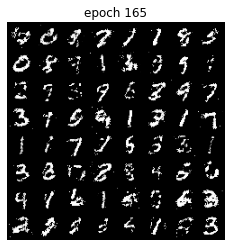

Epoch 165 of 100
Generator loss: 1.61681406, Discriminator loss: 0.92203616


118it [00:54,  2.15it/s]                         


Epoch 166 of 100
Generator loss: 1.64866822, Discriminator loss: 0.89318160


118it [00:54,  2.18it/s]                         


Epoch 167 of 100
Generator loss: 1.64792143, Discriminator loss: 0.90226601


118it [00:55,  2.14it/s]                         


Epoch 168 of 100
Generator loss: 1.61982405, Discriminator loss: 0.90336736


118it [35:31, 18.06s/it]                            


Epoch 169 of 100
Generator loss: 1.46122397, Discriminator loss: 0.96834044


118it [00:49,  2.37it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


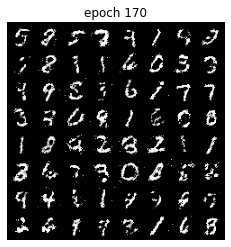

Epoch 170 of 100
Generator loss: 1.40389712, Discriminator loss: 0.99704512


118it [00:43,  2.71it/s]                         


Epoch 171 of 100
Generator loss: 1.53261776, Discriminator loss: 0.94173139


118it [00:48,  2.43it/s]                         


Epoch 172 of 100
Generator loss: 1.52224628, Discriminator loss: 0.94778892


118it [00:47,  2.47it/s]                         


Epoch 173 of 100
Generator loss: 1.46715801, Discriminator loss: 0.97067602


118it [00:43,  2.74it/s]                         


Epoch 174 of 100
Generator loss: 1.38930393, Discriminator loss: 1.01041289


118it [00:43,  2.74it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


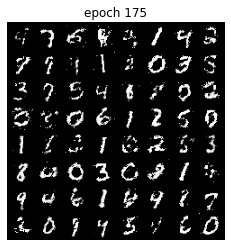

Epoch 175 of 100
Generator loss: 1.44818250, Discriminator loss: 0.96961908


118it [00:29,  4.04it/s]                         


Epoch 176 of 100
Generator loss: 1.41964885, Discriminator loss: 0.98841791


118it [00:29,  4.02it/s]                         


Epoch 177 of 100
Generator loss: 1.50324865, Discriminator loss: 0.94477205


118it [00:18,  6.28it/s]                         


Epoch 178 of 100
Generator loss: 1.48898283, Discriminator loss: 0.95162564


118it [32:01, 16.29s/it]                           


Epoch 179 of 100
Generator loss: 1.46457211, Discriminator loss: 0.96657064


118it [00:17,  6.66it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


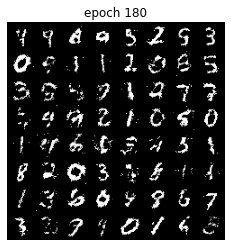

Epoch 180 of 100
Generator loss: 1.56687121, Discriminator loss: 0.92342499


118it [17:14,  8.77s/it]                           


Epoch 181 of 100
Generator loss: 1.51352033, Discriminator loss: 0.98456850


118it [20:31, 10.44s/it]                           


Epoch 182 of 100
Generator loss: 1.41681642, Discriminator loss: 0.99208202


118it [00:18,  6.49it/s]                         


Epoch 183 of 100
Generator loss: 1.56114960, Discriminator loss: 0.92374499


118it [00:16,  7.20it/s]                         


Epoch 184 of 100
Generator loss: 1.56955093, Discriminator loss: 0.93478610


118it [00:16,  7.04it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


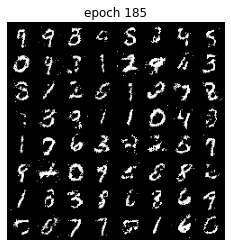

Epoch 185 of 100
Generator loss: 1.46482236, Discriminator loss: 0.97712077


118it [00:16,  7.04it/s]                         


Epoch 186 of 100
Generator loss: 1.52624446, Discriminator loss: 0.94663693


118it [00:16,  7.04it/s]                         


Epoch 187 of 100
Generator loss: 1.60094014, Discriminator loss: 0.92175447


118it [00:16,  7.22it/s]                         


Epoch 188 of 100
Generator loss: 1.52692577, Discriminator loss: 0.92296251


118it [00:16,  7.22it/s]                         


Epoch 189 of 100
Generator loss: 1.50199860, Discriminator loss: 0.94346983


118it [00:17,  6.93it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


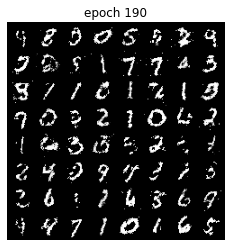

Epoch 190 of 100
Generator loss: 1.52035608, Discriminator loss: 0.94086335


118it [00:16,  6.94it/s]                         


Epoch 191 of 100
Generator loss: 1.52882090, Discriminator loss: 0.95920501


118it [00:17,  6.71it/s]                         


Epoch 192 of 100
Generator loss: 1.58616853, Discriminator loss: 0.94891846


118it [00:16,  7.05it/s]                         


Epoch 193 of 100
Generator loss: 1.49535329, Discriminator loss: 0.99088220


118it [00:16,  7.18it/s]                         


Epoch 194 of 100
Generator loss: 1.49811111, Discriminator loss: 0.94495545


118it [00:17,  6.88it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


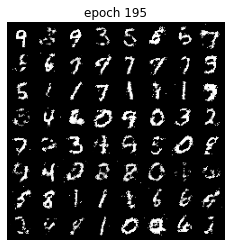

Epoch 195 of 100
Generator loss: 1.44946964, Discriminator loss: 1.00292470


118it [00:16,  7.18it/s]                         


Epoch 196 of 100
Generator loss: 1.42073961, Discriminator loss: 0.98704076


118it [00:16,  7.24it/s]                         


Epoch 197 of 100
Generator loss: 1.52282836, Discriminator loss: 0.94304359


118it [00:16,  7.18it/s]                         


Epoch 198 of 100
Generator loss: 1.55873687, Discriminator loss: 0.93278631


118it [00:16,  7.23it/s]                         


Epoch 199 of 100
Generator loss: 1.44526597, Discriminator loss: 0.99038208


118it [00:16,  7.15it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


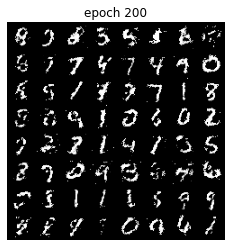

Epoch 200 of 100
Generator loss: 1.41821457, Discriminator loss: 0.99397244


118it [00:15,  7.43it/s]                         

Epoch 201 of 100
Generator loss: 1.49175569, Discriminator loss: 0.96074255


In [14]:
torch.manual_seed(7777)

def generator_loss(output, true_label):
    return criterion(output, true_label)
    
    
    ######################################
    
def discriminator_loss(output, true_label):
    return criterion(output, true_label)
    
    
    ######################################
    

for epoch in range(201):
    loss_g = 0.0
    loss_d = 0.0
    for bi, data in tqdm(enumerate(train_loader), total=int(len(train_data)/train_loader.batch_size)):
        ############ YOUR CODE HERE ########## 
        real_images = data[0]
        fake_images = generator(noise)
       
        optim_d.zero_grad()
        true_predictions = discriminator(real_images)
        false_predictions = discriminator(fake_images)
        discriminator_loss_real = discriminator_loss(true_predictions, label_real(real_images.size(0)))
        discriminator_loss_fake = discriminator_loss(false_predictions, label_fake(fake_images.size(0)))
        discriminator_loss_real.backward()
        discriminator_loss_fake.backward()
        loss_d += discriminator_loss_real.item() + discriminator_loss_fake.item()
        optim_d.step()
        
        
        ##GENERATOR:
        fake_images = generator(noise)
        optim_g.zero_grad()
        prediction = discriminator(fake_images)
        generator_loss_fake = generator_loss(prediction, label_real(fake_images.size(0)))
        generator_loss_fake.backward()
        optim_g.step()
        
        
        ##Print loss
        loss_g += generator_loss_fake.item()
        
        ######################################
    
    
    # create the final fake image for the epoch
    generated_img = generator(noise).cpu().detach()
    
    # make the images as grid
    generated_img = make_grid(generated_img)
    
    # visualize generated images
    if (epoch + 1) % 5 == 0 or epoch == 0:
        plt.imshow(generated_img.permute(1, 2, 0))
        plt.title(f'epoch {epoch+1}')
        plt.axis('off')
        plt.show()
    
    # save the generated torch tensor models to disk
    save_generator_image(generated_img, f"outputs/gen_img{epoch+1}.png")
    images.append(generated_img)
    epoch_loss_g = loss_g / bi # total generator loss for the epoch
    epoch_loss_d = loss_d / bi # total discriminator loss for the epoch
    losses_g.append(epoch_loss_g)
    losses_d.append(epoch_loss_d)
    
    print(f"Epoch {epoch+1} of {epochs}")
    print(f"Generator loss: {epoch_loss_g:.8f}, Discriminator loss: {epoch_loss_d:.8f}")

In [15]:
print('DONE TRAINING')
torch.save(generator.state_dict(), 'outputs/generator.pth')

DONE TRAINING


In [16]:
# save the generated images as GIF file
imgs = [np.array(to_pil_image(img)) for img in images]
imageio.mimsave('outputs/generator_images.gif', imgs)

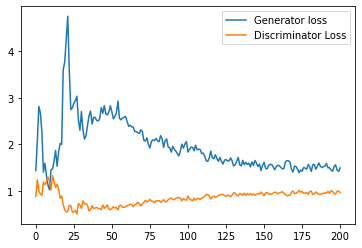

In [17]:
# plot and save the generator and discriminator loss
plt.figure()
plt.plot(losses_g, label='Generator loss')
plt.plot(losses_d, label='Discriminator Loss')
plt.legend()
plt.savefig('outputs/loss.png')